<a href="https://colab.research.google.com/github/b4lbs/Ceub_IA/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means é um algorítimo de clusterização, um dos mais populares, sendo versátil por ser facilmente utilizado em vários contextos.


In [78]:
import pandas as pd 
import sklearn 

In [79]:
nome_colunas = ["Altura_Sepala", "Largura_Sepala", "Altura_Petala", "Largura_Petala", "Classe"]

In [80]:
dataFrame = pd.read_csv('/content/iris.data', names = nome_colunas)

In [81]:
dataFrame.shape


(150, 5)

In [82]:
dataFrame.tail(10)

,Altura_Sepala,Largura_Sepala,Altura_Petala,Largura_Petala,Classe
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [83]:
#Cluesterização trabalha com dados numéricos
dataFrame.dtypes

Altura_Sepala     float64
Largura_Sepala    float64
Altura_Petala     float64
Largura_Petala    float64
Classe             object
dtype: object

In [84]:
#Cópida do dataFrame sem as Classes 
dataFrameCluster = dataFrame.drop(columns=['Classe'])

In [85]:
dataFrameCluster.shape


(150, 4)

In [86]:
dataFrameCluster.tail()

,Altura_Sepala,Largura_Sepala,Altura_Petala,Largura_Petala
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [87]:
#Importando o algorítimo que faz a Clusterização, K-means 
from sklearn.cluster import KMeans

In [88]:
objCluster = KMeans(n_clusters=3)

In [89]:
#Treinamento do algorítimo 
objCluster.fit(dataFrameCluster)

KMeans(n_clusters=3)

In [90]:
#Analisando o resultado 
arrayResultado = objCluster.fit_predict(dataFrameCluster)
arrayResultado

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [91]:
#Adicionando uma coluna das áreas 
#dataFrameCluster["Área_Sepala"] = dataFrameCluster['Altura_Sepala'] * dataFrameCluster['Largura_Sepala']

In [92]:
'''Colocar uma coluna de área piorou a clusterização 
from sklearn.cluster import KMeans 
objCluster2 = KMeans(n_clusters=3)
objCluster2.fit(dataFrameCluster)
arrayResultado = objCluster2.fit_predict(dataFrameCluster)
arrayResultado'''

'Colocar uma coluna de área piorou a clusterização \nfrom sklearn.cluster import KMeans \nobjCluster2 = KMeans(n_clusters=3)\nobjCluster2.fit(dataFrameCluster)\narrayResultado = objCluster2.fit_predict(dataFrameCluster)\narrayResultado'

In [93]:
objCluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0, 0.5, 'Largura da Sepala')

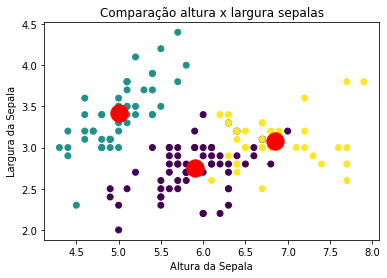

In [94]:
#Gráfico de posição dos centroides
import matplotlib.pyplot as plt 
plt.scatter(dataFrameCluster.iloc[:,0], dataFrameCluster.iloc[:,1], c=objCluster.labels_)
plt.scatter(objCluster.cluster_centers_[:,0], objCluster.cluster_centers_[:,1], s=300,c='red')
plt.title('Comparação altura x largura sepalas')
plt.xlabel('Altura da Sepala')
plt.ylabel('Largura da Sepala')

Text(0, 0.5, 'Largura da Petala')

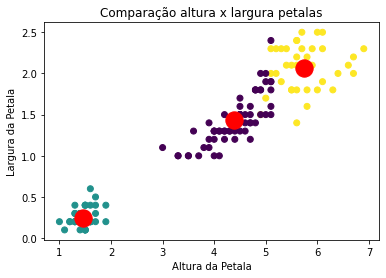

In [95]:
plt.scatter(dataFrameCluster.iloc[:,2], dataFrameCluster.iloc[:,3], c=objCluster.labels_)
plt.scatter(objCluster.cluster_centers_[:,2], objCluster.cluster_centers_[:,3], s=300,c='red')
plt.title('Comparação altura x largura petalas')
plt.xlabel('Altura da Petala')
plt.ylabel('Largura da Petala')

Saber o número de grupos ideal para o problema é um dos maiores problemas da clusterização. Elementos dentro de um mesmo cluster devem ter similaridades, e elementos de cluster distintos devem ter discrepâncias.

In [96]:
variancia = []
for i in range(1,11):
  objClusterElbow  = KMeans(n_clusters=i)
  objClusterElbow.fit(dataFrameCluster)
  variancia.append(objClusterElbow.inertia_)
variancia

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.53558205128205,
 38.95701115711986,
 34.421947665056365,
 30.00188187558267,
 27.964318181818186,
 26.324618834381994]

Text(0, 0.5, 'Variância')

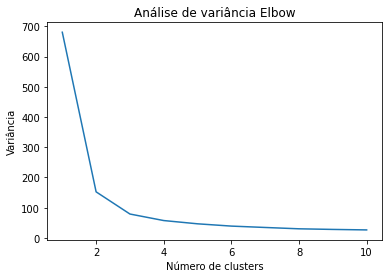

In [97]:
plt.plot(range(1,11), variancia)
plt.title("Análise de variância Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Variância")
